In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import FeatureHasher
from sklearn import set_config
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Salary Data.csv')

In [ ]:
df1.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [ ]:
df2.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [ ]:
df2.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<Axes: >

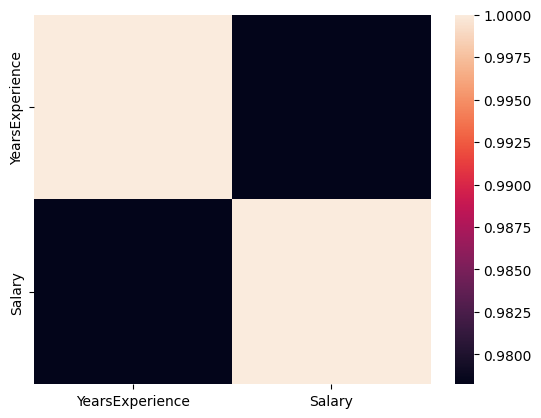

In [ ]:
sns.heatmap(df1.corr())

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df1.drop(columns = ['Salary'] , axis = 1) , df1['Salary'] , test_size = 0.3)

In [ ]:
tf1_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,1))])
tf2_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,1))])
m_lr =  LinearRegression()


pipe_lr = Pipeline([('Nan Imputer',tf1_lr),('StandardScaler',tf2_lr),('Linear Regression',m_lr)])


pipe_lr.fit(x_train,y_train)


y_predict_lr = pipe_lr.predict(x_test)


print("MAE = ",mean_absolute_error(y_test,y_predict_lr))
print("MSE = ",mean_squared_error(y_test,y_predict_lr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('r2 Score = ',r2_score(y_test,y_predict_lr))


set_config(display='diagram')
pipe_lr

MAE =  6236.208380538959
MSE =  54221733.252840094
RMSE =  7363.540809477468
r2 Score =  0.8933789641537085


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 1, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 1, None))])),
                ('Linear Regression', LinearRegression())])

In [ ]:
tf1_dtr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,1))])
tf2_dtr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,1))])
m_dtr   =  DecisionTreeRegressor()


pipe_dtr = Pipeline([('Nan Imputer',tf2_dtr),('StandardScaler',tf2_dtr),('Decision Tree Regressor',m_dtr)])


pipe_dtr.fit(x_train,y_train)


y_predict_dtr = pipe_dtr.predict(x_test)


print("MAE = ",mean_absolute_error(y_test,y_predict_dtr))
print("MSE = ",mean_squared_error(y_test,y_predict_dtr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_dtr)))
print('r2 Score = ',r2_score(y_test,y_predict_dtr))


set_config(display='diagram')
pipe_dtr

MAE =  36936.77777777778
MSE =  1872871852.3333333
RMSE =  43276.689479826586
r2 Score =  -2.682795162079832


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 1, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 1, None))])),
                ('Decision Tree Regressor', DecisionTreeRegressor())])

In [ ]:
tf1 = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,1))])
tf2 = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,1))])
m1 = LinearRegression()
m2 = DecisionTreeRegressor()
ensemble_model = VotingRegressor(estimators=[('model1',m1),('model2',m2)])


pipe_lrdtr = Pipeline([('Nan Imputer',tf1),('StandardScaler',tf2),('EnsembleModel',ensemble_model)])


pipe_lrdtr.fit(x_train,y_train)


y_predict = pipe_lrdtr.predict(x_test)


print("MAE = ",mean_absolute_error(y_test,y_predict))
print("MSE = ",mean_squared_error(y_test,y_predict))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict)))
print('r2 Score = ',r2_score(y_test,y_predict))


set_config(display='diagram')
pipe_lrdtr

MAE =  5664.9154969609535
MSE =  51101801.13966228
RMSE =  7148.552380703542
r2 Score =  0.8995139652634287


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 1, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 1, None))])),
                ('EnsembleModel',
                 VotingRegressor(estimators=[('model1', LinearRegression()),
                                             ('model2',
                                              DecisionTreeRegressor())]))])

In [ ]:
tf1_rfr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,1))])
tf2_rfr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,1))])
m_rfr   = RandomForestRegressor()

pipe_rfr = Pipeline([('Nan Imputer',tf1_rfr),('StandardScaler',tf2_rfr),('Random Forest Regressor',m_rfr)])

pipe_rfr.fit(x_train,y_train)


y_predict_rfr = pipe_rfr.predict(x_test)


print("MAE = ",mean_absolute_error(y_test,y_predict_rfr))
print("MSE = ",mean_squared_error(y_test,y_predict_rfr))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict_rfr)))
print('r2 Score = ',r2_score(y_test,y_predict_rfr))
set_config(display='diagram')
pipe_rfr

MAE =  6692.545555555555
MSE =  63829289.11650002
RMSE =  7989.323445480225
r2 Score =  0.8744867691484728


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 1, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 1, None))])),
                ('Random Forest Regressor', RandomForestRegressor())])

In [ ]:
r2 = []

for i in range(1000):

    x_train,x_test,y_train,y_test = train_test_split(df1.drop(columns = ['Salary'] , axis = 1) , df1['Salary'] , test_size = 0.3, random_state = i)

    tf1_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,1))])
    tf2_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,1))])
    m_lr =  LinearRegression()


    pipe_lr = Pipeline([('Nan Imputer',tf1_lr),('StandardScaler',tf2_lr),('Linear Regression',m_lr)])


    pipe_lr.fit(x_train,y_train)
    y_predict_lr = pipe_lr.predict(x_test)

    r2.append(('r2 Score = ',r2_score(y_test,y_predict_lr)))


set_config(display='diagram')
pipe_lr

Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 1, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 1, None))])),
                ('Linear Regression', LinearRegression())])

In [ ]:
print('Random State which is giving maximum accuracy =', r2.index(max(r2)))

Random State which is giving maximum accuracy = 103
